In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)

Warning message:
“package ‘Seurat’ was built under R version 4.0.5”
Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
wt="./mWT/outs/filtered_feature_bc_matrix"
ko="./mNFIXko/outs/filtered_feature_bc_matrix"

In [3]:
wt_10x = Read10X(wt)

10X data contains more than one type and is being returned as a list containing matrices of each type.



In [4]:
ko_10x = Read10X(ko)

10X data contains more than one type and is being returned as a list containing matrices of each type.



In [8]:
rownames(x = wt_10x[["Antibody Capture"]]) <- gsub(pattern = "_[control_]*TotalA", replacement = "", x = rownames(x = wt_10x[["Antibody Capture"]]))

In [10]:
rownames(x = ko_10x[["Antibody Capture"]]) <- gsub(pattern = "_[control_]*TotalA", replacement = "", x = rownames(x = ko_10x[["Antibody Capture"]]))

In [65]:
tmp <- CreateSeuratObject(counts = wt_10x[["Gene Expression"]], min.cells = 0, min.features = 0)
tmp[["ADT"]] <- CreateAssayObject(wt_10x[["Antibody Capture"]][, colnames(x = tmp)])
tmp <- NormalizeData(tmp, assay = "ADT", normalization.method = "CLR")
write.table(as.matrix(GetAssayData(object = tmp@assays$ADT , slot = "data")), 'WT_ADT_CLR_norm.csv', sep = ',', row.names = T, col.names = T, quote = F)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Normalizing across features



In [66]:
tmp <- CreateSeuratObject(counts = ko_10x[["Gene Expression"]], min.cells = 0, min.features = 0)
tmp[["ADT"]] <- CreateAssayObject(ko_10x[["Antibody Capture"]][, colnames(x = tmp)])
tmp <- NormalizeData(tmp, assay = "ADT", normalization.method = "CLR")
write.table(as.matrix(GetAssayData(object = tmp@assays$ADT , slot = "data")), 'KO_ADT_CLR_norm.csv', sep = ',', row.names = T, col.names = T, quote = F)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Normalizing across features



In [63]:
wt_10_filter@assays$ADT@data

,AAACCCAAGTGATCGG-1,AAACCCACAAACCATC-1,AAACCCACACTGTCCT-1,AAACCCACAGCCATTA-1,AAACCCAGTACCTAAC-1,AAACCCAGTCCTCCTA-1,AAACCCAGTGAATTAG-1,AAACCCAGTTCTCTCG-1,AAACCCATCAAATGAG-1,AAACCCATCTGTCCCA-1,⋯,TTTGGTTTCGTCGCTT-1,TTTGGTTTCTATCGTT-1,TTTGGTTTCTCCCTAG-1,TTTGTTGAGAGAAGGT-1,TTTGTTGCAATCGCAT-1,TTTGTTGCACACGGTC-1,TTTGTTGGTCGAGCTC-1,TTTGTTGGTCGTGATT-1,TTTGTTGTCATCGACA-1,TTTGTTGTCATTGTGG-1
Sca1,1.0952325,2.0368068,0.5574444,1.3312649,1.6349100,0.5574444,0.9714034,0.40377665,0.2987916,0.9714034,⋯,1.5646012,0.3350252,0.1391016,1.3180375,0.3350252,0.09484997,1.1439421,1.4071529,0.97140341,0.3699916
CD150,0.7569637,1.5429411,0.3863371,0.8417508,2.3448410,1.3908133,2.1563571,0.09012964,0.5069459,0.0000000,⋯,1.6389793,0.1728033,0.0000000,0.3200993,0.2491609,0.09012964,0.4484587,0.2491609,2.75450862,0.0000000
CD48,0.0000000,0.9722159,0.1677527,1.1216665,1.9234614,1.7166949,1.7699412,0.61644911,0.2179504,0.3113655,⋯,0.3113655,1.9145268,0.9949828,0.5830296,1.4121933,1.26892219,1.3666794,0.8498901,0.05910003,0.1149013
CD16-32,1.1662804,0.9259079,0.1418605,1.0665017,1.1176350,0.1418605,1.7178395,0.42752373,0.1418605,0.5664946,⋯,1.0923951,1.1176350,0.6088343,1.0923951,2.4827329,1.32001721,0.8952513,1.3401702,0.00000000,0.0734437
CD105,0.5998623,1.1388450,1.1605374,0.9459454,1.2816508,1.2229265,1.3724558,1.24288693,1.5759605,0.1283739,⋯,0.8627971,0.5217003,0.3916521,0.8912884,0.0000000,0.59986234,0.6723555,0.3916521,1.11667156,0.9977693
CD41,0.7876277,1.7565989,0.0000000,1.4712997,2.5259274,0.3915489,1.2227017,0.00000000,0.2148171,0.2148171,⋯,0.2148171,0.6721995,0.6721995,0.6721995,0.2148171,0.54168765,0.2148171,0.5416877,0.89110037,0.2148171
CD71,0.1789511,0.3987129,2.1220922,0.4624041,0.7074455,0.9804590,0.9430099,2.12794319,2.7781418,0.1789511,⋯,0.1789511,0.4624041,0.6058666,0.2948568,2.6272400,0.68300164,0.9986704,0.2190977,0.09347318,2.2892257
CD34,0.3471979,0.8088348,0.3471979,0.6044217,0.3471979,0.3471979,0.6044217,0.60442172,0.9784716,0.6044217,⋯,0.6044217,0.6044217,0.3471979,0.8088348,0.0000000,0.60442172,0.0000000,0.3471979,0.60442172,0.9784716


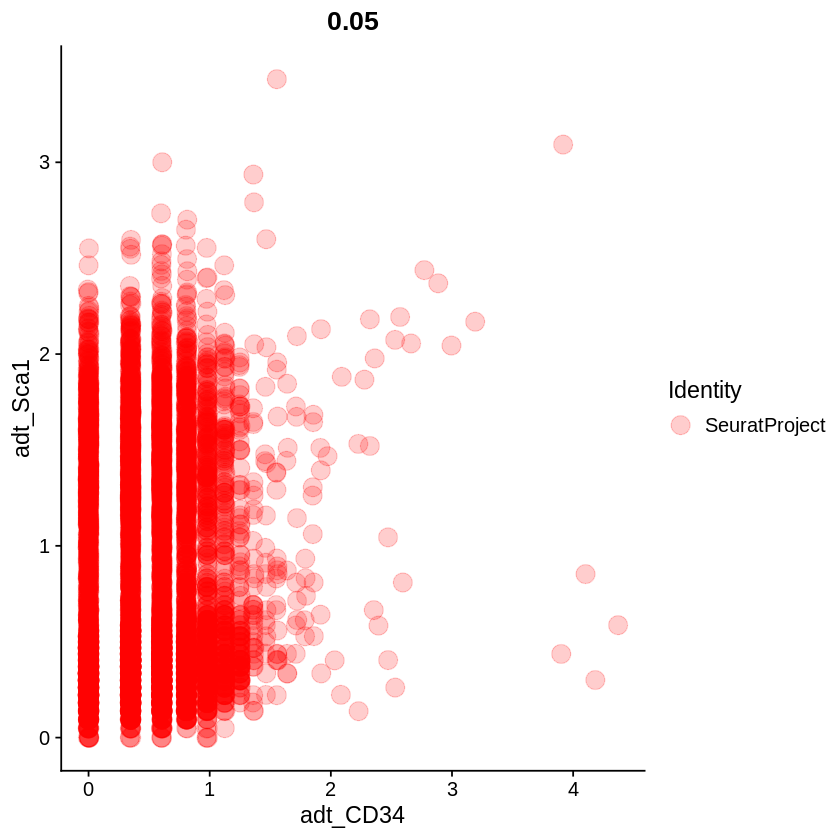

In [42]:
FeatureScatter(wt_10_filter, feature1 = "adt_CD34", feature2 = "adt_Sca1", pt.size = 5,cols = c("#FF000032"))

In [32]:
wt_10_filter[["ADT"]] 

Assay data with 8 features for 7702 cells
First 8 features:
 Sca1, CD150, CD48, CD16-32, CD105, CD41, CD71, CD34 

In [33]:
export_data_from_seurat(wt_10_filter)

ERROR: Error in export_data_from_seurat(wt_10_filter): could not find function "export_data_from_seurat"


In [64]:
write.table(as.matrix(GetAssayData(object = wt_10_filter@assays$ADT , slot = "data")), 'counts.csv', sep = ',', row.names = T, col.names = T, quote = F)

In [39]:
wt_10_filter[["ADT"]]

Assay data with 8 features for 7702 cells
First 8 features:
 Sca1, CD150, CD48, CD16-32, CD105, CD41, CD71, CD34 

In [53]:
wt_10_filter@assays$RNA@scale.data

<0 x 0 matrix>

In [58]:
GetAssayData(object = wt_10_filter , slot = "counts")

   [[ suppressing 32 column names ‘AAACCCAAGTGATCGG-1’, ‘AAACCCACAAACCATC-1’, ‘AAACCCACACTGTCCT-1’ ... ]]

   [[ suppressing 32 column names ‘AAACCCAAGTGATCGG-1’, ‘AAACCCACAAACCATC-1’, ‘AAACCCACACTGTCCT-1’ ... ]]

   [[ suppressing 32 column names ‘AAACCCAAGTGATCGG-1’, ‘AAACCCACAAACCATC-1’, ‘AAACCCACACTGTCCT-1’ ... ]]



14661 x 7702 sparse Matrix of class "dgCMatrix"
                                                                                          
Mrpl15         .  .   1  4   3   6  .  8   2  .  1  12  1  6  2   2   2  3  .  .  .  .   3
Lypla1         .  .   1  1   .   .  1  1   .  1  .   1  .  .  .   .   .  .  .  .  .  .   1
Gm37988        .  .   .  .   .   .  .  .   .  .  .   .  .  .  .   .   .  .  .  .  .  .   .
Tcea1          .  .   .  2   2   1  3  .   1  1  1   3  2  2  1   8   2  1  .  .  .  1   1
Atp6v1h        .  .   .  .   .   1  1  1   .  .  1   1  .  .  1   .   1  .  .  .  .  .   .
Rb1cc1         1  2   2  1   4   .  1  2   1  .  .   .  .  .  .   .   1  1  .  .  1  1   3
4732440D04Rik  .  .   .  .   .   .  .  .   .  .  .   .  .  .  .   .   .  .  .  .  .  1   .
Pcmtd1         .  .   .  .   1   .  1  .   2  2  .   .  .  .  1   .   .  .  .  .  .  1   .
Gm26901        .  .   .  2   .   .  .  .   .  .  .   .  .  .  .   .   .  .  .  .  .  .   .
Rrs1           .  1   1  .   4   7  2  2  